# Breast Cancer (Exploratory Data Analysis)

In [98]:
!pip install opendatasets

  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73057 sha256=a17cd09cf0d869fa6ea82563e17eadef815ab583f166abc55703cba500e91959
  Stored in directory: c:\users\daud\appdata\local\pip\cache\wheels\29\da\11\144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle


## Import important libraries

In [1]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#warnings
import warnings
warnings.filterwarnings('ignore')

## Download and Load Dataset

In [44]:
import os
from six.moves import urllib
import opendatasets as od

DOWNLOAD_ROOT = "https://www.kaggle.com/uciml/breast-cancer-wisconsin-data?select=data.csv"
DATA_PATH = "data"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH

def fetch_data(data_url = DOWNLOAD_ROOT, data_path = DATA_PATH):
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    od.download(data_url)

In [45]:
fetch_data()

Skipping, found downloaded files in ".\breast-cancer-wisconsin-data" (use force=True to force download)


The function fetches and downloads data using the Kaggle API. The API uses a special key that is saved in 
a JSON document as alongside with the username as the means of authorization and authentication

In [49]:
def load_housing_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "data.csv")
    return pd.read_csv(csv_path)

In [50]:
df = load_housing_data()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Explore Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
df.shape

(569, 33)

The dataset has 569 rows and 33 columns. The diagnosis column classifies tumor as 'M' for malignant and 'B' for benign. The last column 'Unnamed:32' has all Nans and will not be useful in the analysis

## Checking for missing values

In [12]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [13]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

The diagnosis columns which seems to be the target has a total rows of 569. 357 are classified as 'B' which
implies 'benign' and 212 are classified as 'M' which implies malignant

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

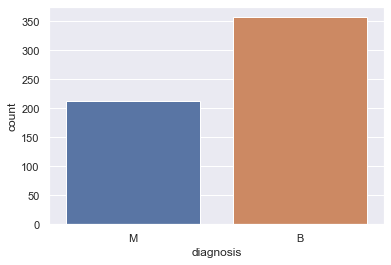

In [14]:
sns.countplot(x='diagnosis', data=df)

In [15]:
df.sort_values(by = ['diagnosis'],
        ascending=[True]).head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
284,8912284,B,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.03390,...,19.69,92.12,595.6,0.09926,0.2317,0.3344,0.10170,0.1999,0.07127,NaN
371,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,15.73,104.50,819.1,0.11260,0.1737,0.1362,0.08178,0.2487,0.06766,NaN
367,9011495,B,12.21,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.02027,...,24.04,93.85,624.6,0.13680,0.2170,0.2413,0.08829,0.3218,0.07470,NaN
364,9010877,B,13.40,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.01473,...,21.70,93.76,663.5,0.12130,0.1676,0.1364,0.06987,0.2741,0.07582,NaN
363,9010872,B,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,...,25.45,117.20,1009.0,0.13380,0.1679,0.1663,0.09123,0.2394,0.06469,NaN


In [16]:
df[df['diagnosis']== 'B'].mean()

id                         2.654382e+07
radius_mean                1.214652e+01
texture_mean               1.791476e+01
perimeter_mean             7.807541e+01
area_mean                  4.627902e+02
smoothness_mean            9.247765e-02
compactness_mean           8.008462e-02
concavity_mean             4.605762e-02
concave points_mean        2.571741e-02
symmetry_mean              1.741860e-01
fractal_dimension_mean     6.286739e-02
radius_se                  2.840824e-01
texture_se                 1.220380e+00
perimeter_se               2.000321e+00
area_se                    2.113515e+01
smoothness_se              7.195902e-03
compactness_se             2.143825e-02
concavity_se               2.599674e-02
concave points_se          9.857653e-03
symmetry_se                2.058381e-02
fractal_dimension_se       3.636051e-03
radius_worst               1.337980e+01
texture_worst              2.351507e+01
perimeter_worst            8.700594e+01
area_worst                 5.588994e+02


In [17]:
df[df['diagnosis'] == 'M'].mean()

id                         3.681805e+07
radius_mean                1.746283e+01
texture_mean               2.160491e+01
perimeter_mean             1.153654e+02
area_mean                  9.783764e+02
smoothness_mean            1.028985e-01
compactness_mean           1.451878e-01
concavity_mean             1.607747e-01
concave points_mean        8.799000e-02
symmetry_mean              1.929090e-01
fractal_dimension_mean     6.268009e-02
radius_se                  6.090825e-01
texture_se                 1.210915e+00
perimeter_se               4.323929e+00
area_se                    7.267241e+01
smoothness_se              6.780094e-03
compactness_se             3.228117e-02
concavity_se               4.182401e-02
concave points_se          1.506047e-02
symmetry_se                2.047240e-02
fractal_dimension_se       4.062406e-03
radius_worst               2.113481e+01
texture_worst              2.931821e+01
perimeter_worst            1.413703e+02
area_worst                 1.422286e+03


## Features Distribution

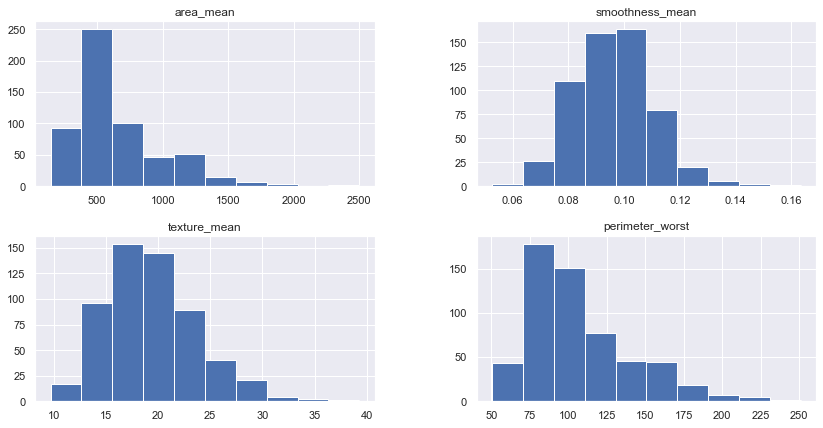

In [51]:
features = ['area_mean', 'smoothness_mean', 'texture_mean', 'perimeter_worst']
df[features].hist(figsize=(14, 7));

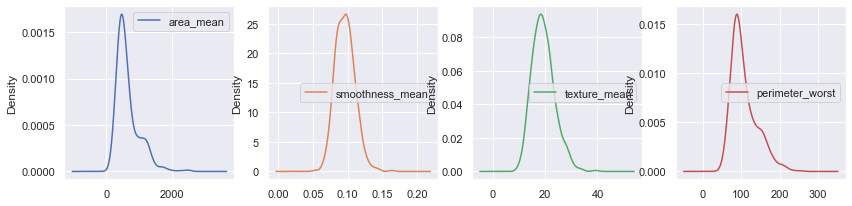

In [54]:
df[features].plot(kind='density', subplots=True, layout=(2, 4), 
                  sharex=False, figsize=(14, 7));

In [11]:
# y includes our labels and x includes our features
y = df.diagnosis                          # M or B 
list = ['id','diagnosis']
x_new = df.drop(list, axis = 1 )

## Checking for outliers

Outliers are observations that are far away from the other data points in a random sample of a population. There are many ways to detect outliers, including statistical methods, proximity-based methods, or supervised outlier detection, and the use of plots such as violinplot and boxplot. 

Outliers in the data were identified by using plots and proximity based methods. This was done by take 10 of the features at a time to plot.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

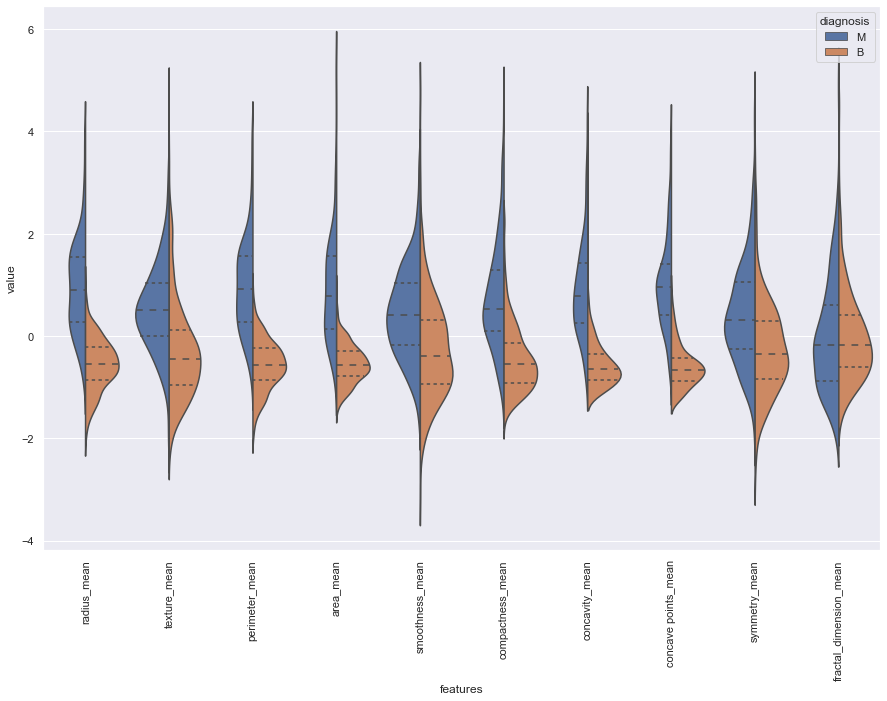

In [19]:
# first ten features
data_dia = y
data = x_new
data_std = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

<AxesSubplot:xlabel='features', ylabel='value'>

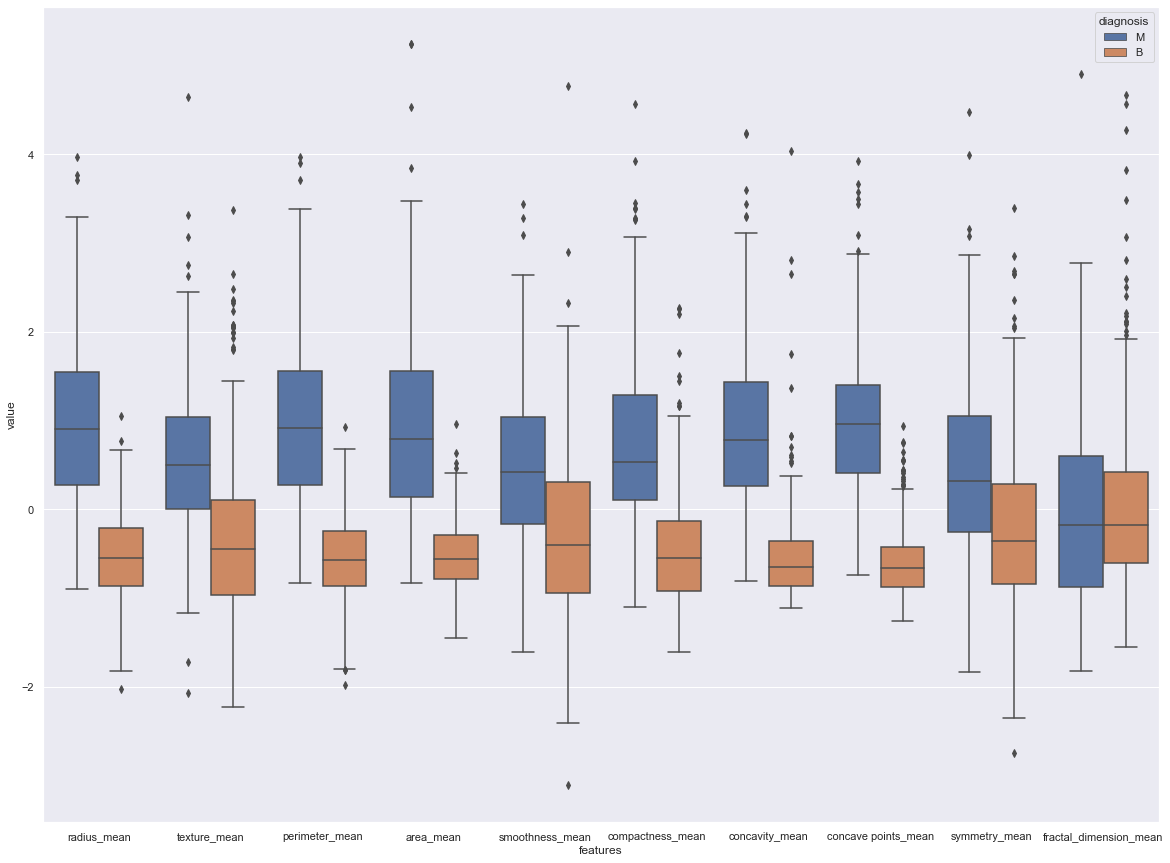

In [20]:
# first ten features
data_dia = y
data = x_new
data_std = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,15))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

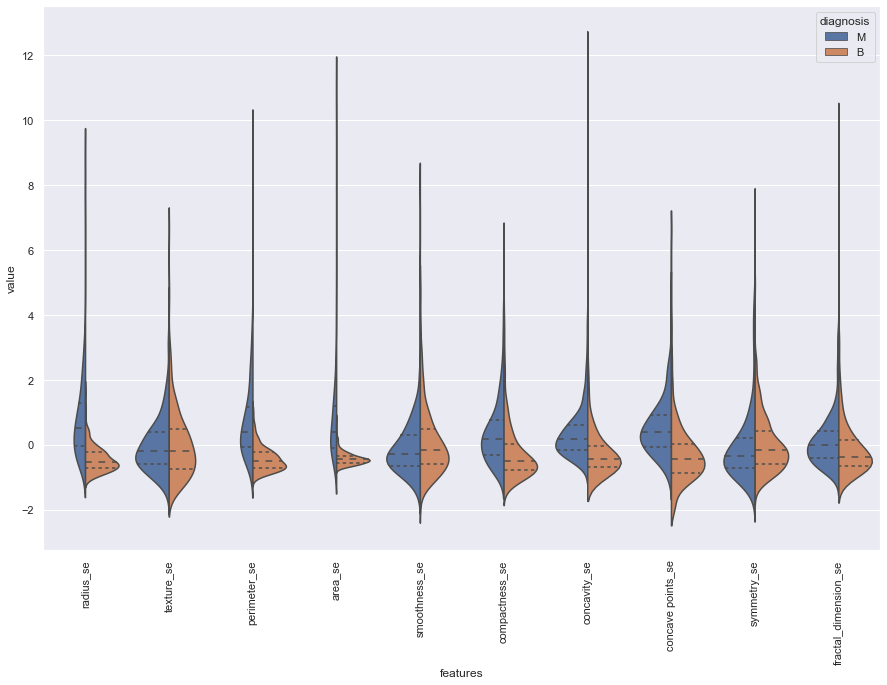

In [170]:
# Second ten features
data = pd.concat([y,data_std.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

<AxesSubplot:xlabel='features', ylabel='value'>

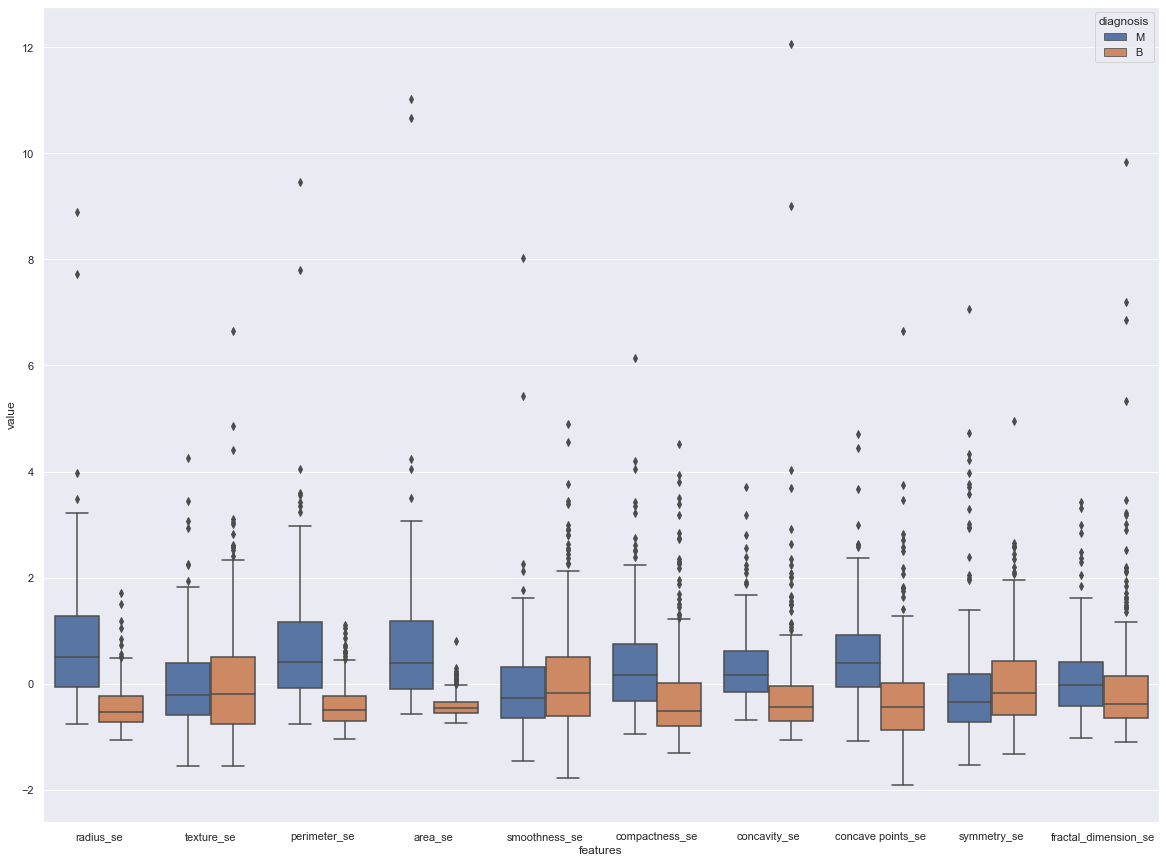

In [172]:
# Second ten features
data = pd.concat([y,data_std.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(20,15))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst'),
  Text(10, 0, 'Unnamed: 32')])

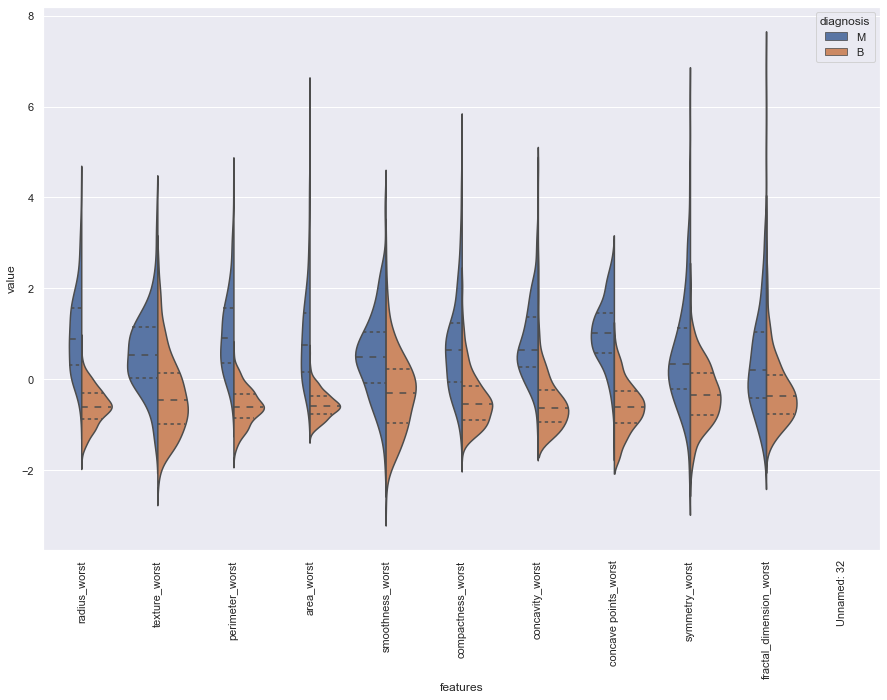

In [174]:
# Last ten features
data = pd.concat([y,data_std.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

<AxesSubplot:xlabel='features', ylabel='value'>

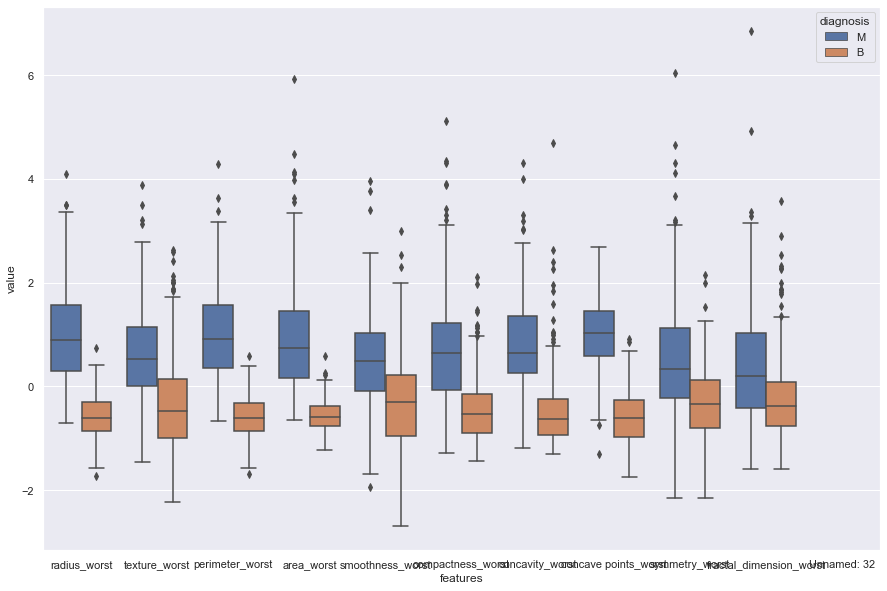

In [175]:
# Last ten features
data = pd.concat([y,data_std.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)

In [21]:
import scipy as sp
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

In [12]:
x_new = x_new.drop('Unnamed: 32', axis =1)

In [25]:
#Robust Mahalonibis Distance
def robust_mahalanobis_method(df):
    #Minimum covariance determinant
    rng = np.random.RandomState(0)
    real_cov = np.cov(df.values.T)
    X = rng.multivariate_normal(mean=np.mean(df, axis=0), cov=real_cov, size=506)
    cov = MinCovDet(random_state=0).fit(X)
    mcd = cov.covariance_ #robust covariance metric
    robust_mean = cov.location_  #robust mean
    inv_covmat = sp.linalg.inv(mcd) #inverse covariance metric
    
    #Robust M-Distance
    x_minus_mu = df - robust_mean
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    
    #Flag as outlier
    outlier = []
    C = np.sqrt(chi2.ppf((1-0.001), df=df.shape[1]))#degrees of freedom = number of variables
    for index, value in enumerate(md):
        if value > C:
            outlier.append(index)
        else:
            continue
    return outlier, md
outliers_mahal_rob, md_rb = robust_mahalanobis_method(df=x_new)

A widely used distance metric for the detection of multivariate outliers is the Mahalanobis distance (MD). The MD is a measure that determines the distance between a data point x and a distribution D. It is a multivariate generalization of the internally studentized residuals (z-score).This means the MD defines how many standard deviations x is away from the mean of D. Like the z-score, the MD of each observation is compared to a cut-off point. Assuming a multivariate normal distribution of the data with K variables, the Mahalanobis distance follows a chi-squared distribution with K degrees of freedom. 
Source: https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33

In [210]:
md_rb

array([10.50926993,  6.27669547,  5.30401087, 11.70563626,  5.31451492,
        4.42800737,  3.95366219,  5.01071882,  5.24854237, 13.34876131,
        3.95714985,  6.01720333, 15.60853343,  4.79204249,  6.79218989,
        7.04738654,  4.54790638,  5.26304653,  7.14199567,  3.09714471,
        4.75212886,  4.24558027,  6.42368636,  6.98399596,  7.0411846 ,
        8.14977214,  7.43072802,  4.27546551,  8.3123076 ,  4.61591299,
        6.94807016,  9.38493121,  6.90076506,  7.04778852,  6.40453874,
        7.81326213,  6.07826071,  6.27947918, 13.81700737,  7.61076071,
        4.1411667 ,  5.73463973,  9.34097433,  4.84181035,  5.01789006,
        6.07423821,  4.4188473 ,  5.21745236,  4.56449478,  3.71014843,
        3.0838457 ,  3.69541698,  2.97227996,  6.47974506,  4.74835469,
        3.10731957,  4.96117488,  5.86775909,  3.75339054,  6.17408046,
        7.3488635 ,  6.6416998 ,  7.14200982,  6.90652208,  5.23943761,
        4.50429561,  3.49155484,  3.78407729, 15.12590803,  3.35

Shows all the outliers that are present in the dataset. This was done by using the function

## Correlation

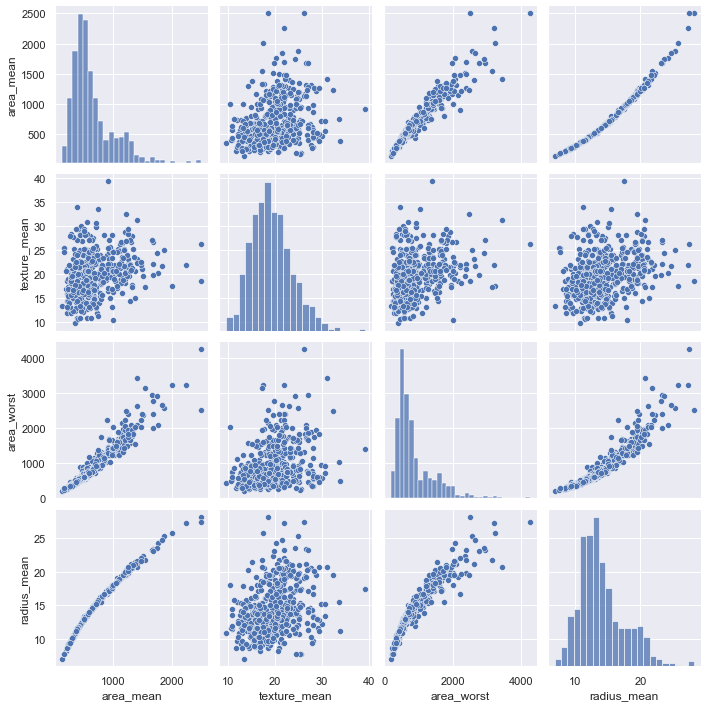

In [96]:
#scatterplot
%config InlineBackend.figure_format = 'png'
cols = ['area_mean', 'texture_mean', 'area_worst', 'radius_mean']
sns.pairplot(df[cols], size = 2.5)
plt.show();

<AxesSubplot:>

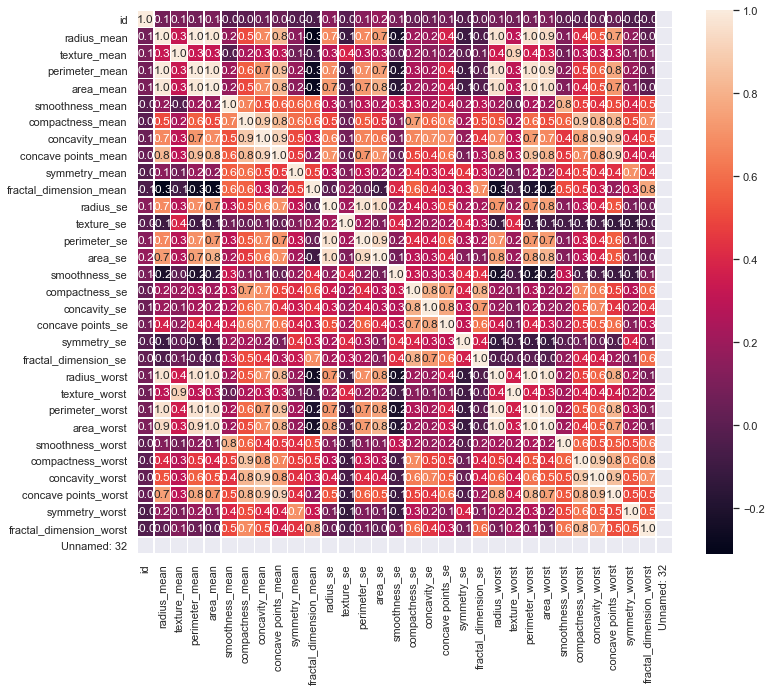

In [30]:
f, ax = plt.subplots(figsize = ( 12, 10))
sns.heatmap( df.corr(), annot = True, linewidth = 0.5, fmt = '.1f', ax = ax )

In [20]:
df2 = df.copy()

In [21]:
d = {'B' : 0, 'M' : 1}

df2['diagnosis'] = df2['diagnosis'].map(d)
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<AxesSubplot:>

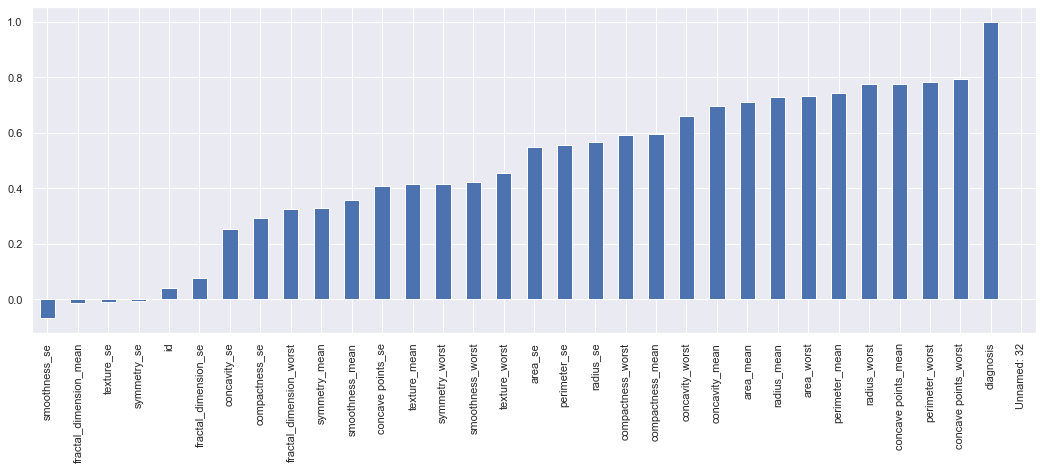

In [45]:
df2.corr()['diagnosis'].sort_values().plot(kind='bar', figsize=(18, 6))

It's a little bit clearer which feature contribute to the diagnosis of a patient as 
either malignant or benign from the figure.

## Handling Outliers

In [28]:
# Create correlation matrix
corr_matrix = x_new.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

We handle the outliers by dropping the highly correlated features in the dataset

In [30]:
to_drop

['perimeter_mean',
 'area_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst']

In [29]:
x_new = x_new.drop(to_drop, axis = 1)

## Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x_new)
y = df2['diagnosis']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)
print(X_train.shape)

(455, 23)


## Modelling

In [34]:
# Define a function which trains models
def models(X_train,y_train):
    
    #Using Logistic Regression 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)

    #Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)

    #Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, y_train)

    #Using DecisionTreeClassifier 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
    
    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    #print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
    print('[1]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[2]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
    #print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
    print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
    
    return log, svc_lin, svc_rbf, tree, forest

In [35]:
model = models(X_train, y_train)

[0]Logistic Regression Training Accuracy: 0.989010989010989
[1]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9868131868131869
[2]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9868131868131869
[3]Decision Tree Classifier Training Accuracy: 1.0
[4]Random Forest Classifier Training Accuracy: 0.9868131868131869


## Feature Extraction

## Dimensionality Reduction

## TSNE

In [56]:
from sklearn.manifold import TSNE


In [57]:
X = df2.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1)

In [59]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

In [83]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(x_scaled)

Wall time: 3.8 s


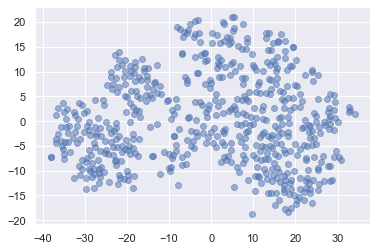

In [84]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

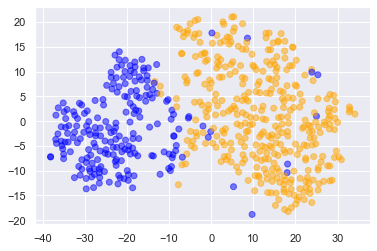

In [85]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['diagnosis'].map({'M': 'blue', 'B': 'orange'}), alpha=.5);

## PCA

In [86]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)
principalDf = pd.DataFrame(data = principalComponents, 
             columns = ['principal component 1', 'principal component 2'])

In [88]:
finalDf = pd.concat([principalDf, df[['diagnosis']]], axis = 1)

In [90]:
finalDf

,principal component 1,principal component 2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


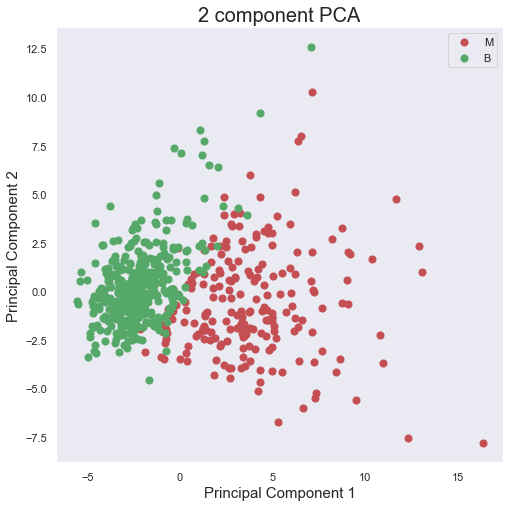

In [97]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['diagnosis'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [215]:
from dowhy import CausalModel
import dowhy.datasets

# Load some sample data
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True)

In [220]:
data['outcome_name']

'y'

In [221]:
data['df']

,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,0.0,0.084262,-0.547420,-1.222759,-0.794523,1.185051,-1.949601,False,-3.152348
1,0.0,0.269192,-0.023545,0.393583,-0.101163,0.383639,-0.252508,True,10.683213
2,0.0,0.989826,0.030275,0.325549,-1.625808,0.345418,0.676669,True,9.187853
3,0.0,0.345500,0.634231,-0.810797,-0.346121,0.842589,-1.408520,True,8.255850
4,0.0,0.394684,0.080635,-0.410761,-1.397259,-0.559083,-1.363348,False,-6.086571
...,...,...,...,...,...,...,...,...,...
9995,0.0,0.926521,-0.767982,-1.324896,-1.459335,1.413604,-0.110176,False,-1.292867
9996,0.0,0.933695,2.960353,1.643586,-1.707132,0.346220,-0.442901,True,9.047202
9997,0.0,0.530451,-0.008715,-0.568618,0.570265,0.801255,-2.492070,False,-1.569905
9998,0.0,0.610040,0.769447,0.333586,1.365740,0.562922,-2.283631,True,10.673427


In [222]:
# I. Create a causal model from the data and given graph.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"])

In [224]:
# II. Identify causal effect and return target estimands
identified_estimand = model.identify_effect()

# III. Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")

# IV. Refute the obtained estimate using multiple robustness checks.
refute_results = model.refute_estimate(identified_estimand, estimate,
                                       method_name="random_common_cause")

WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


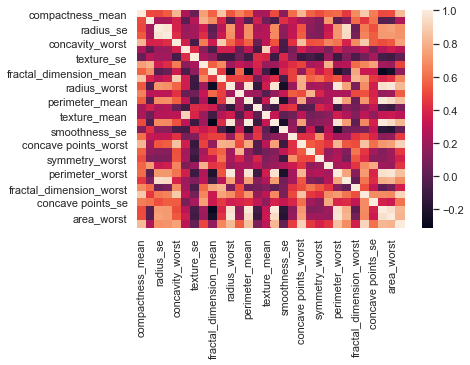

In [29]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['id', 'diagnosis', 'Unnamed: 32']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);